Ερώτημα 1
=========

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/winequality-red.csv")
print("Diastaseis {}".format(df.shape))
df.head()

Diastaseis (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
col_names = df.columns
col_num = df.shape[1]
x = df.loc[:, df.columns[0:11]].to_numpy()
y = df.loc[:, df.columns[11]].to_numpy()

### Κανονικοποίηση δεδομένων

In [6]:
from sklearn import preprocessing

x_normalized = preprocessing.normalize(x, norm='l2')

### Διαχωρισμός δεδομένων
Θέλουμε να διαχωρίσουμε τα δεδομένα σε 2 υποσυνολα: training και test. Όμως πρέπει να προσέξουμε τα δυο σύνολα να έχουν ίδια κατανομή, γιατί απ'οτι φαίνεται και στο παρκάτω διάγραμμα το πλήθος των δεδομένων της κατηγορίας quality=3 ή 4 είναι πολύ λιγότερα από αυτά των κατηγοριών 5 και 6.

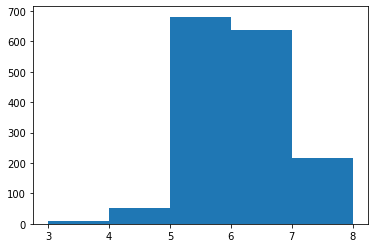

In [7]:
from matplotlib import pyplot as plt
import numpy as np

categories = np.unique(y)
fig,ax = plt.subplots(1,1)
ax.hist(y, bins=categories)
plt.show()

In [8]:
category_indices = []
for category in categories:
    category_indices.append([i for i in range(len(y)) if y[i]==category ])

x_train = []
y_train = []
x_test = []
y_test = []
for i in range(len(category_indices)):
    cat_num = len(category_indices[i])
    for j in range(0, int(0.75*cat_num)):
        k = category_indices[i][j]
        x_train.append(x_normalized[k,:])
        y_train.append(y[k])
    for j in range(int(0.75*cat_num), cat_num):
        k = category_indices[i][j]
        x_test.append(x_normalized[k,:])
        y_test.append(y[k])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


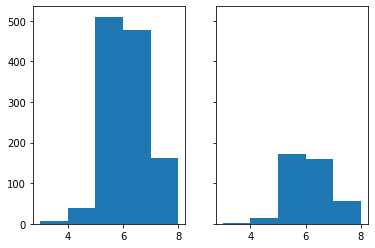

In [11]:
fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].hist(y_train, bins=categories)
axs[1].hist(y_test, bins=categories)
plt.show()

### Support Vector Machine

In [12]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
y_predicted = clf.predict(x_test)
(y_predicted==y_test).sum()/len(y_test)

0.4665012406947891

### F1 Score

In [21]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predicted, average='macro')

0.17114221634827187